In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-websites-dataset/dataset_full.csv
/kaggle/input/phishing-websites-dataset/dataset_small.csv


In [16]:
#Importing All the Libraries here
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

#models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Since the data is already cleanded and there is not much to EDA we can directly move to the Model Trainig Part. And regarding feature engineering I might use PCA and see otherwise there is also not much to do with Features too.

In [4]:
df = pd.read_csv("/kaggle/input/phishing-websites-dataset/dataset_full.csv")
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [5]:
#below are the empty lists created to svae the respective columns 
dot_columns: list[str] = [".", "dot"]
hyphen_columns: list[str] = ["-", "hyphen"]
underline_columns: list[str] = ["_", "underline"]
slash_columns: list[str] = ["/", "slash"]
questionmark_columns: list[str] = ["?", "questionmark"]
equal_columns: list[str] = ["=", "equal"]
at_columns: list[str] = ["@", "at"]
and_columns: list[str] = ["&", "and"]
exclamation_columns: list[str] = ["!", "exclamation"]
space_columns: list[str] = [" ", "space"]
tilde_columns: list[str] = ["∼", "tilde"]
comma_columns: list[str] = [",", "comma"]
plus_columns: list[str] = ["+", "plus"]
asterisk_columns: list[str] = ["*", "asterisk"]
hashtag_columns: list[str] = ["#","hashtag"]
dollar_columns: list[str] = ["$", "dollar"]
percent_columns: list[str] = ["%", "percent"]

columns_types: list[list] = [dot_columns, hyphen_columns, underline_columns, slash_columns, questionmark_columns, 
                             equal_columns, at_columns, and_columns, exclamation_columns, space_columns, tilde_columns, 
                            comma_columns, plus_columns, asterisk_columns, hashtag_columns, dollar_columns, percent_columns]
    
def columns_list(column_sign : list[str]): 
    for columns in df.columns:
        splitby = columns.split("_")
        if len(splitby) >= 3:
            if splitby[1] == column_sign[1]:
                column_sign.append(columns)
    print(column_sign)

    
for i in columns_types:
    columns_list(i)


['.', 'dot', 'qty_dot_url', 'qty_dot_domain', 'qty_dot_directory', 'qty_dot_file', 'qty_dot_params']
['-', 'hyphen', 'qty_hyphen_url', 'qty_hyphen_domain', 'qty_hyphen_directory', 'qty_hyphen_file', 'qty_hyphen_params']
['_', 'underline', 'qty_underline_url', 'qty_underline_domain', 'qty_underline_directory', 'qty_underline_file', 'qty_underline_params']
['/', 'slash', 'qty_slash_url', 'qty_slash_domain', 'qty_slash_directory', 'qty_slash_file', 'qty_slash_params']
['?', 'questionmark', 'qty_questionmark_url', 'qty_questionmark_domain', 'qty_questionmark_directory', 'qty_questionmark_file', 'qty_questionmark_params']
['=', 'equal', 'qty_equal_url', 'qty_equal_domain', 'qty_equal_directory', 'qty_equal_file', 'qty_equal_params']
['@', 'at', 'qty_at_url', 'qty_at_domain', 'qty_at_directory', 'qty_at_file', 'qty_at_params']
['&', 'and', 'qty_and_url', 'qty_and_domain', 'qty_and_directory', 'qty_and_file', 'qty_and_params']
['!', 'exclamation', 'qty_exclamation_url', 'qty_exclamation_domai

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

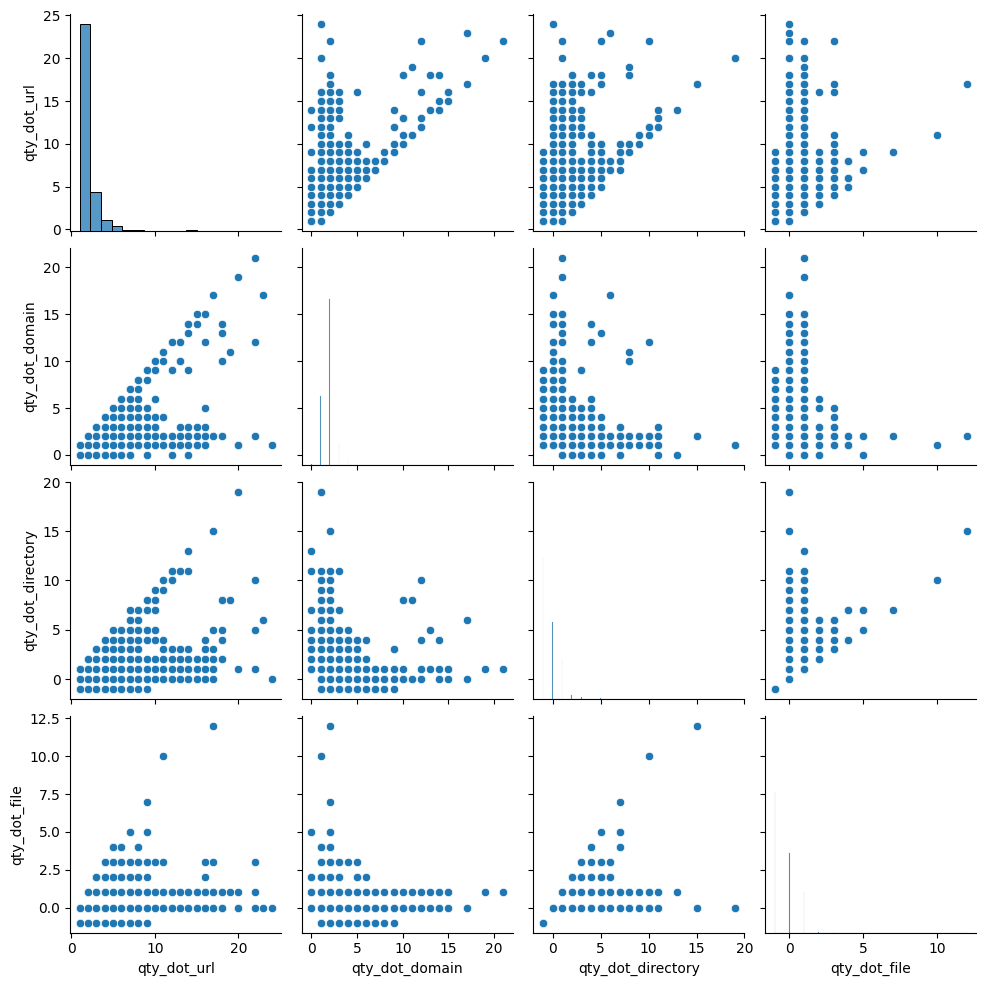

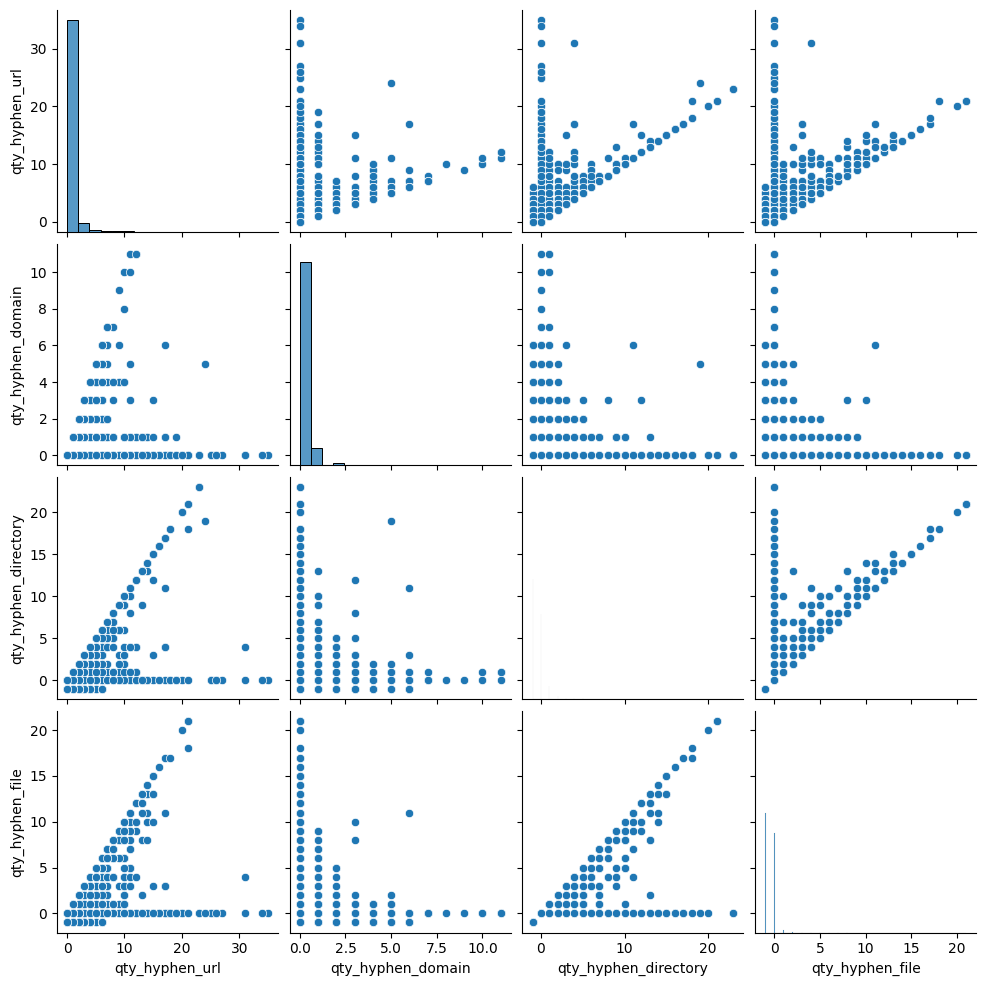

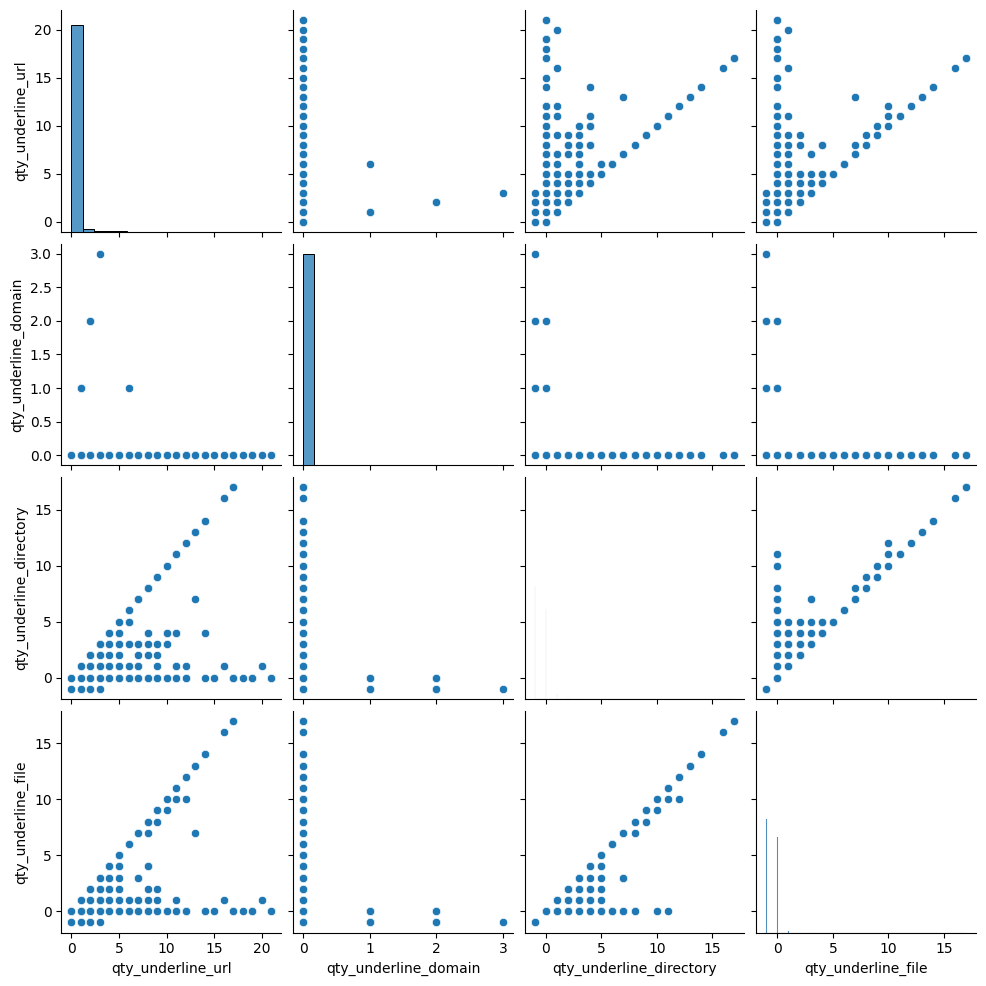

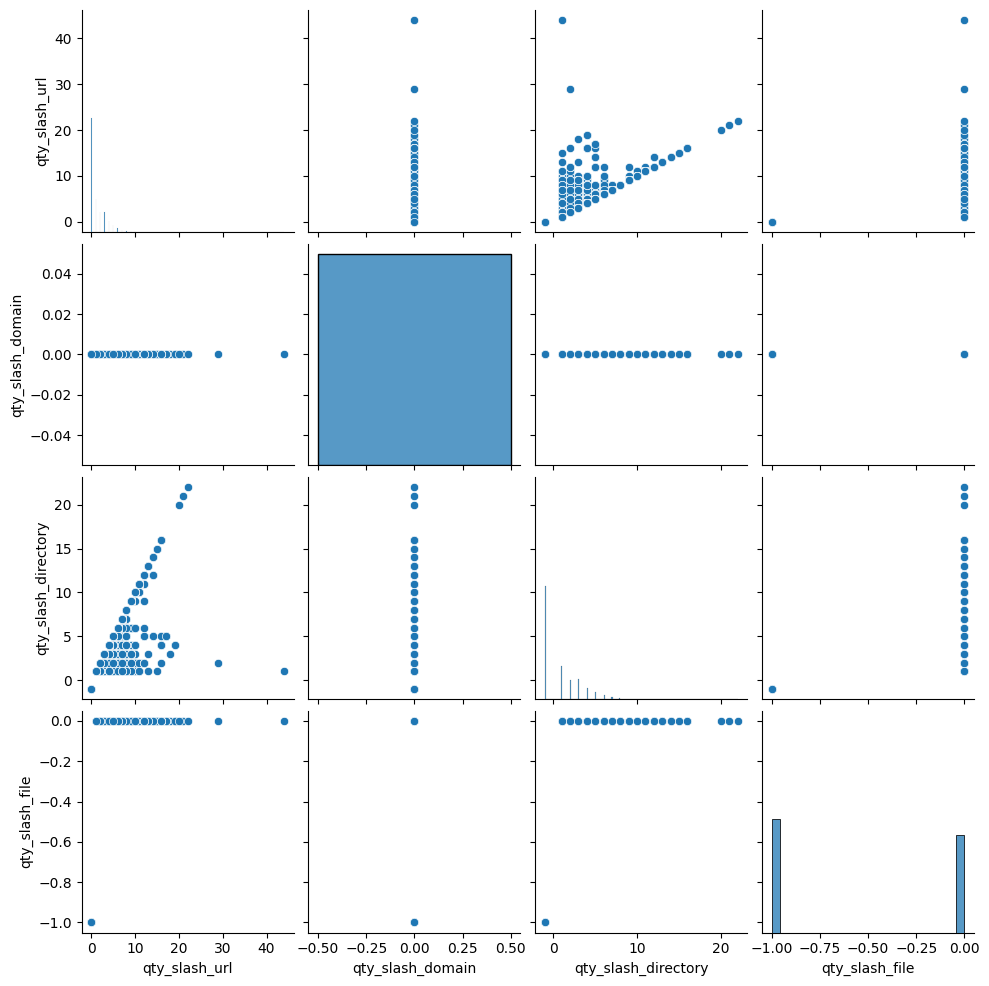

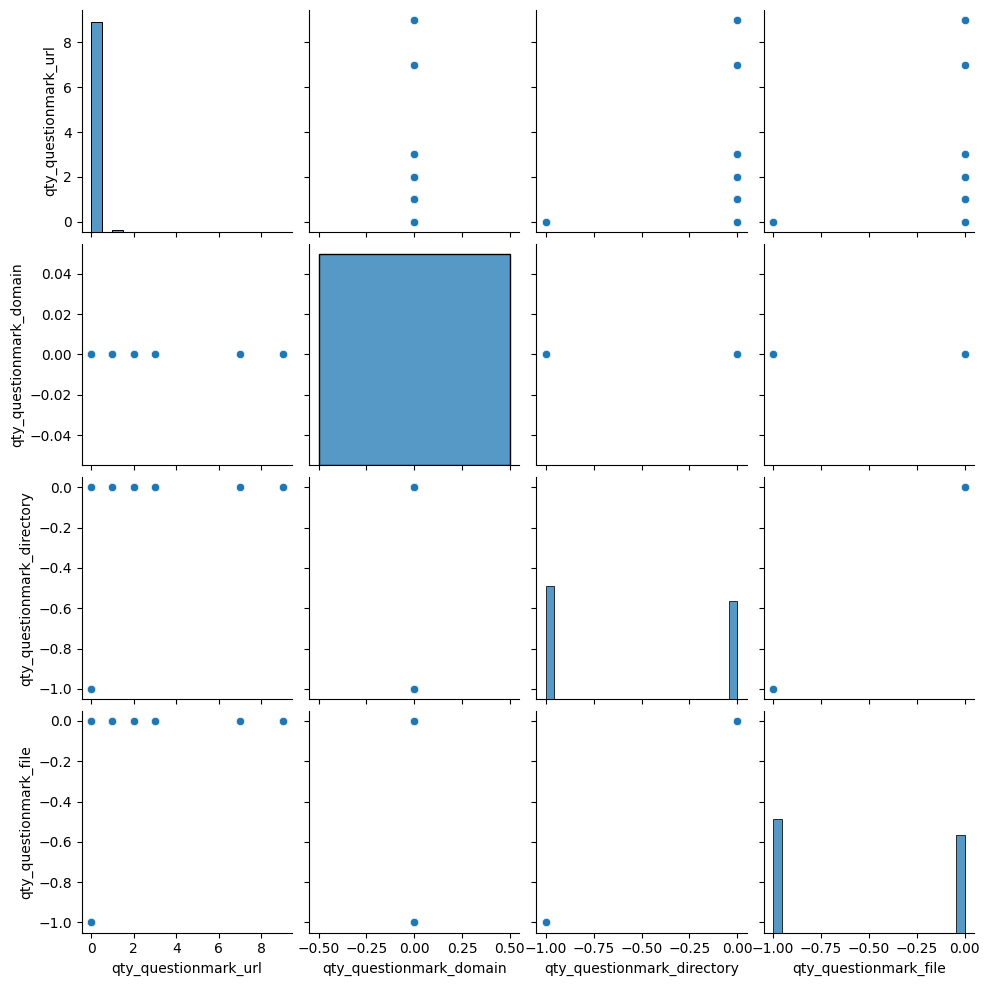

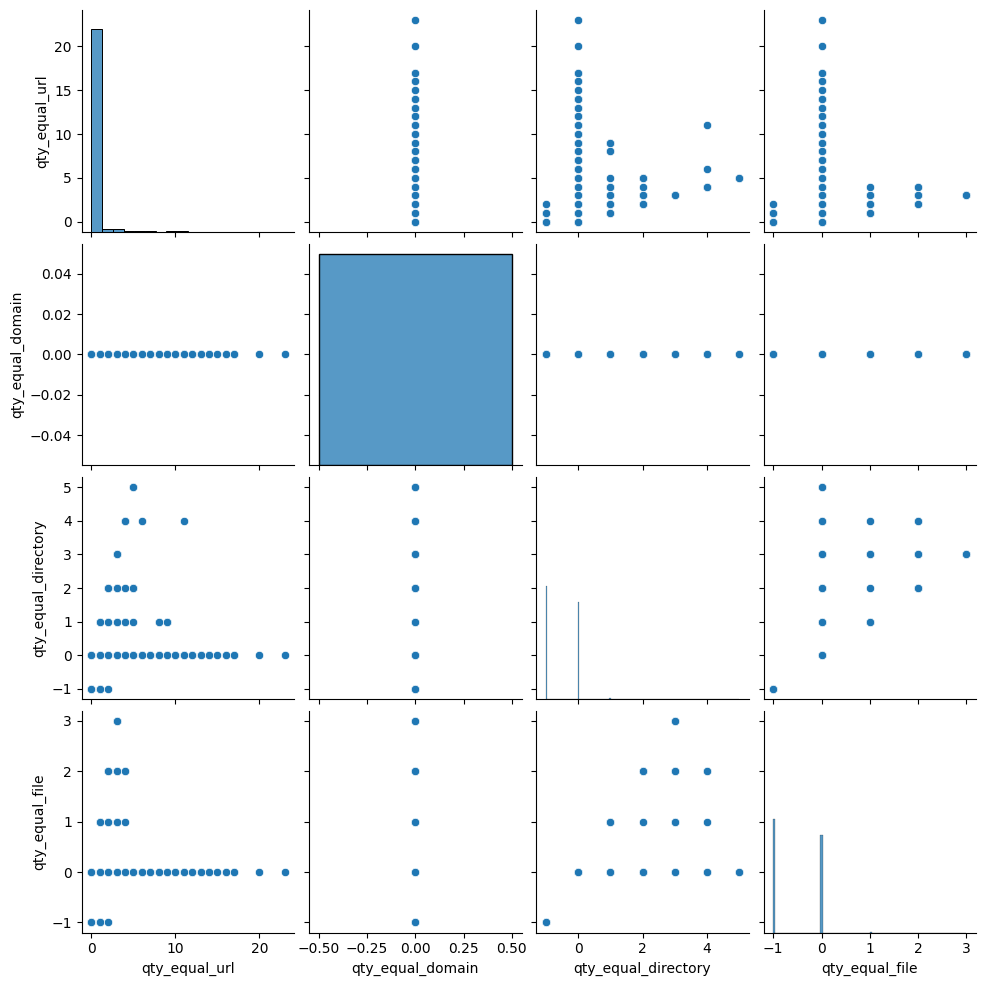

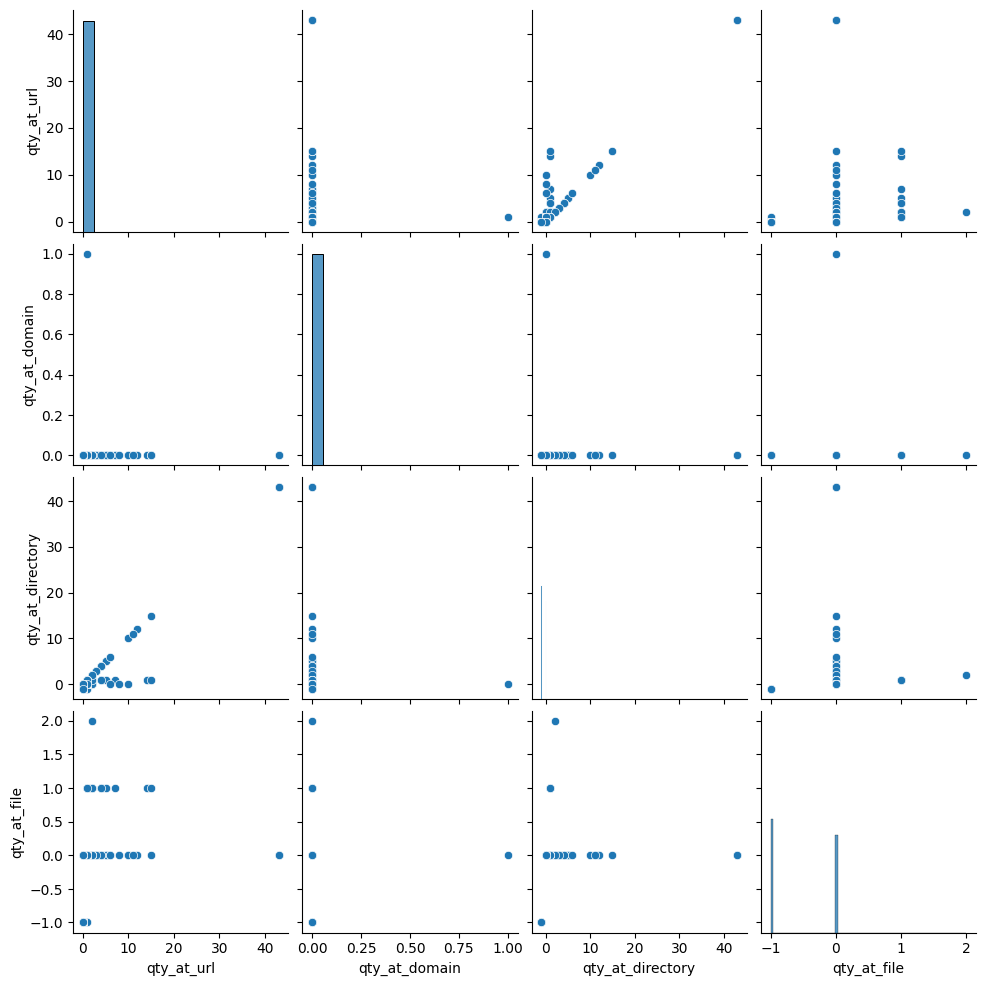

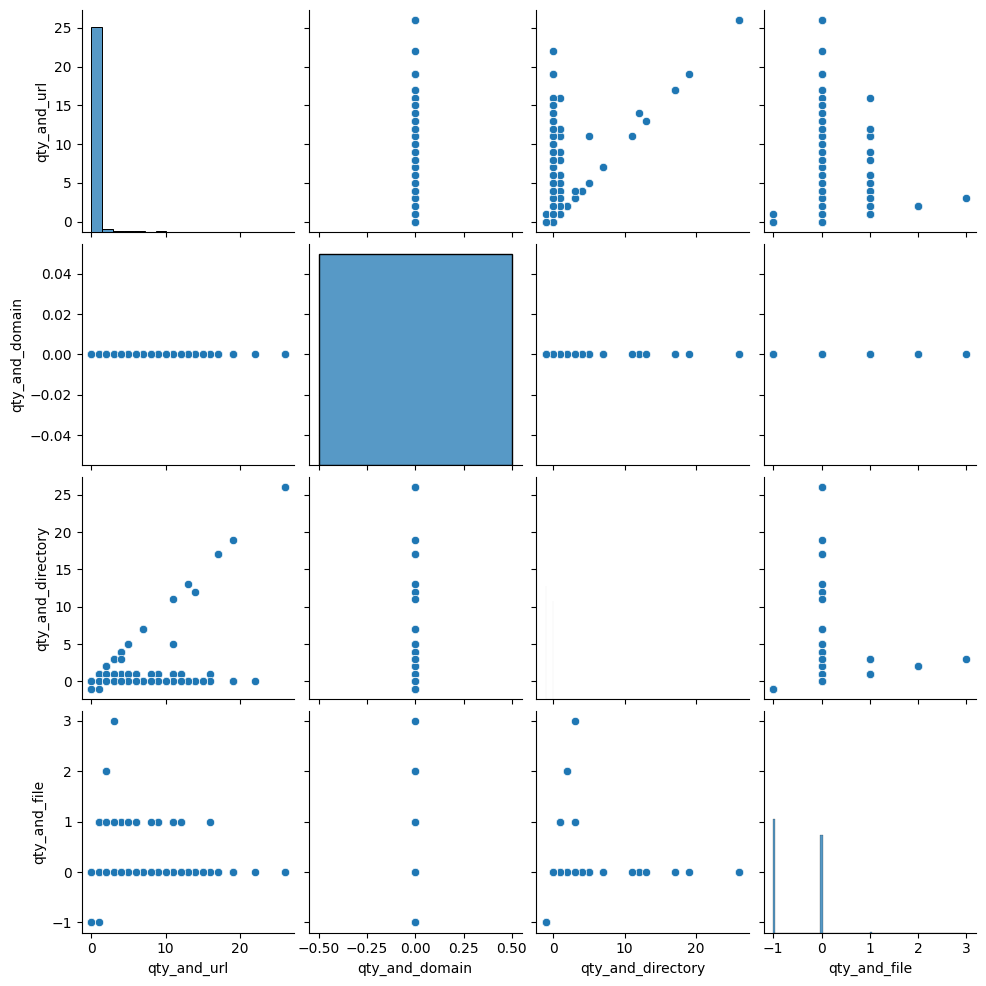

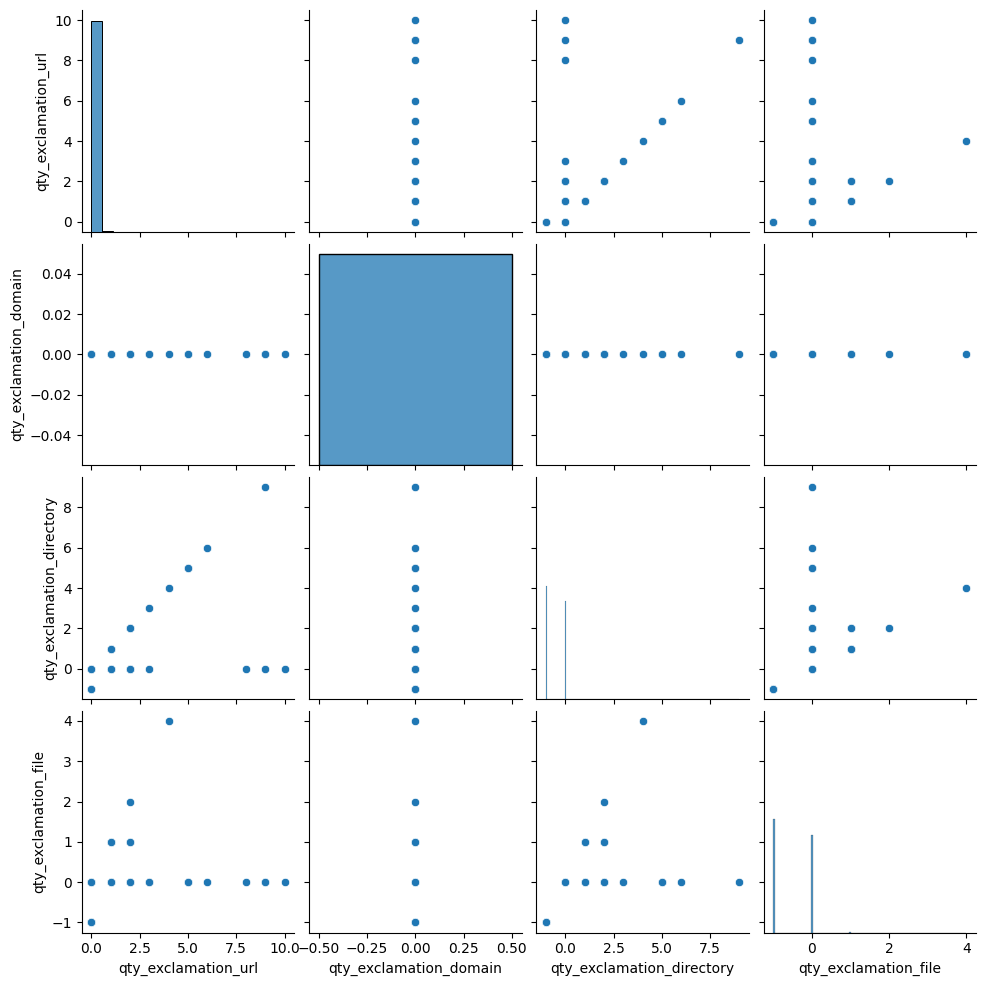

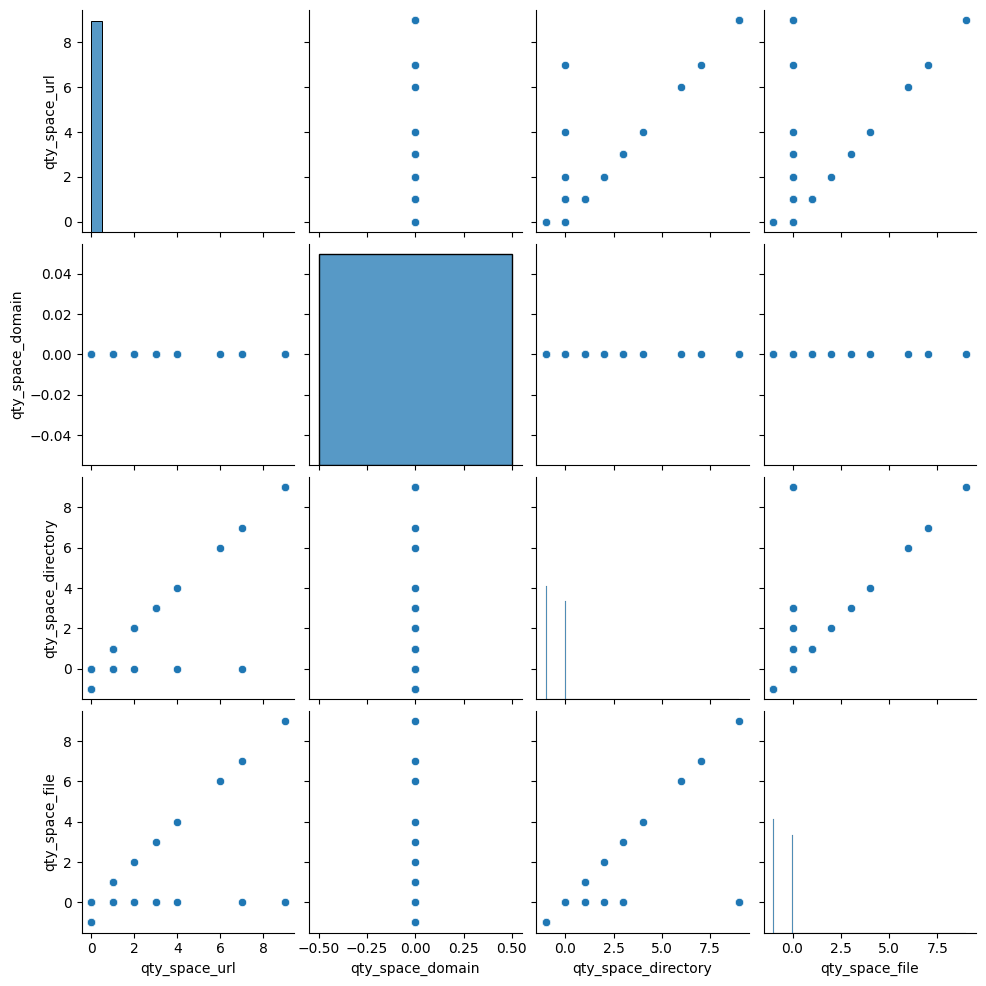

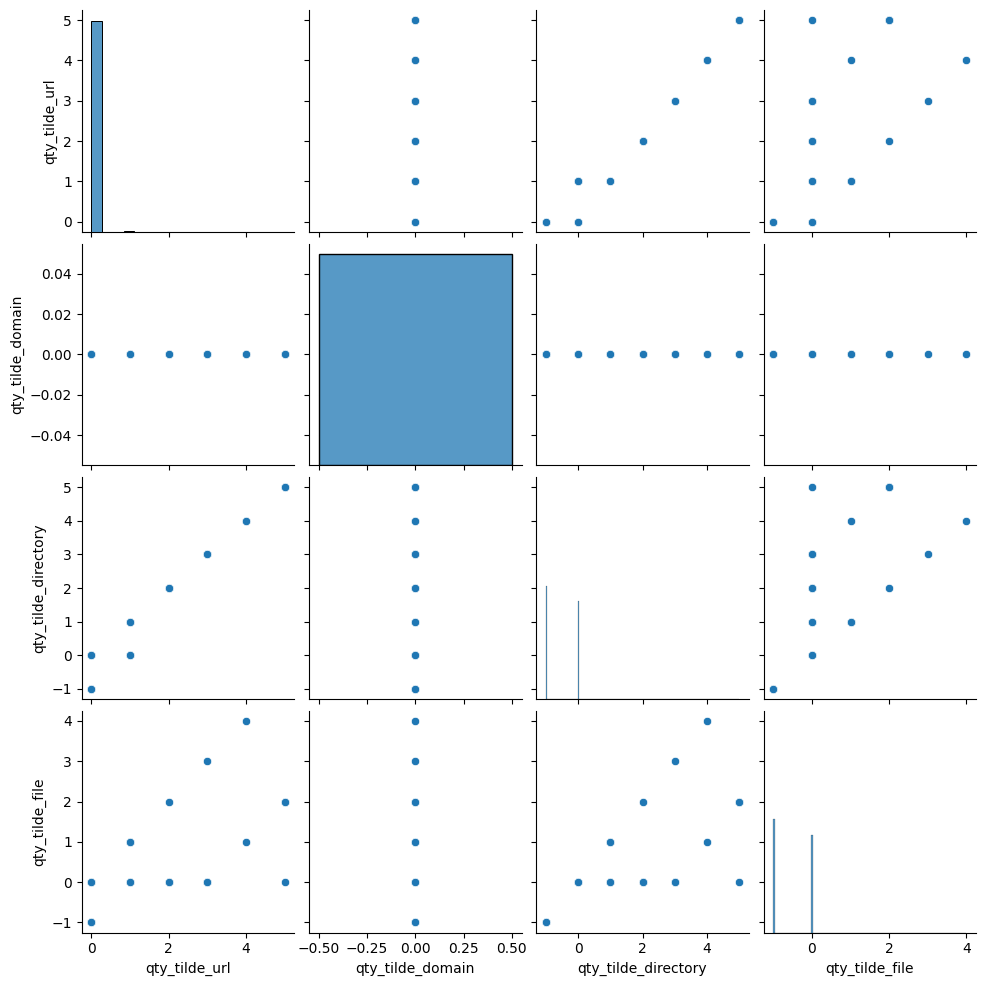

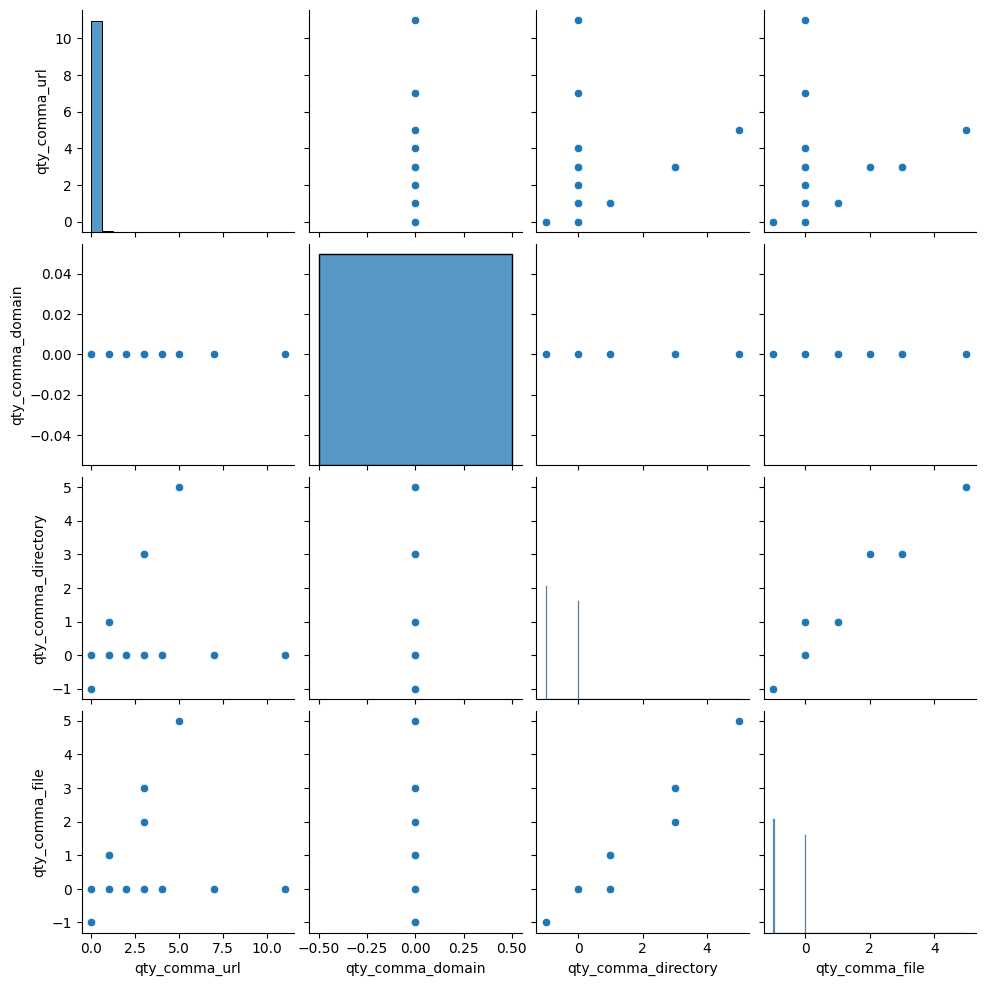

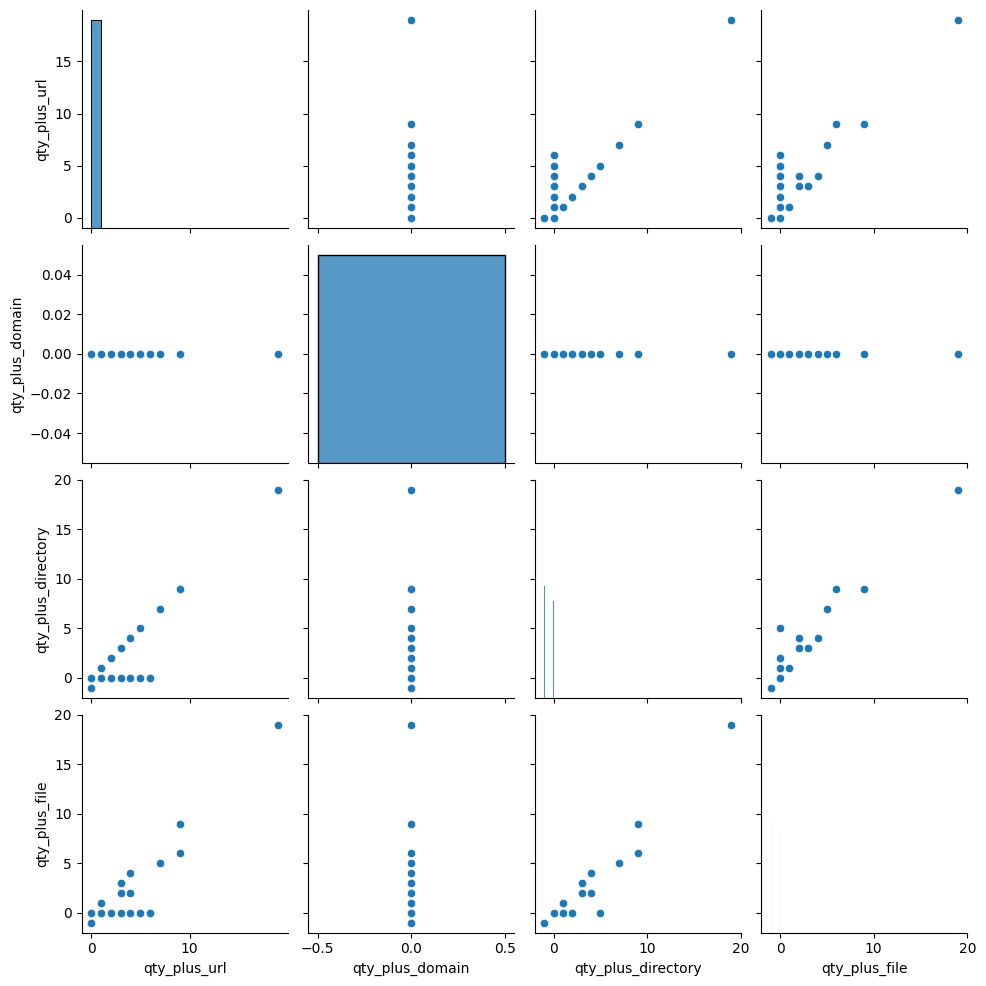

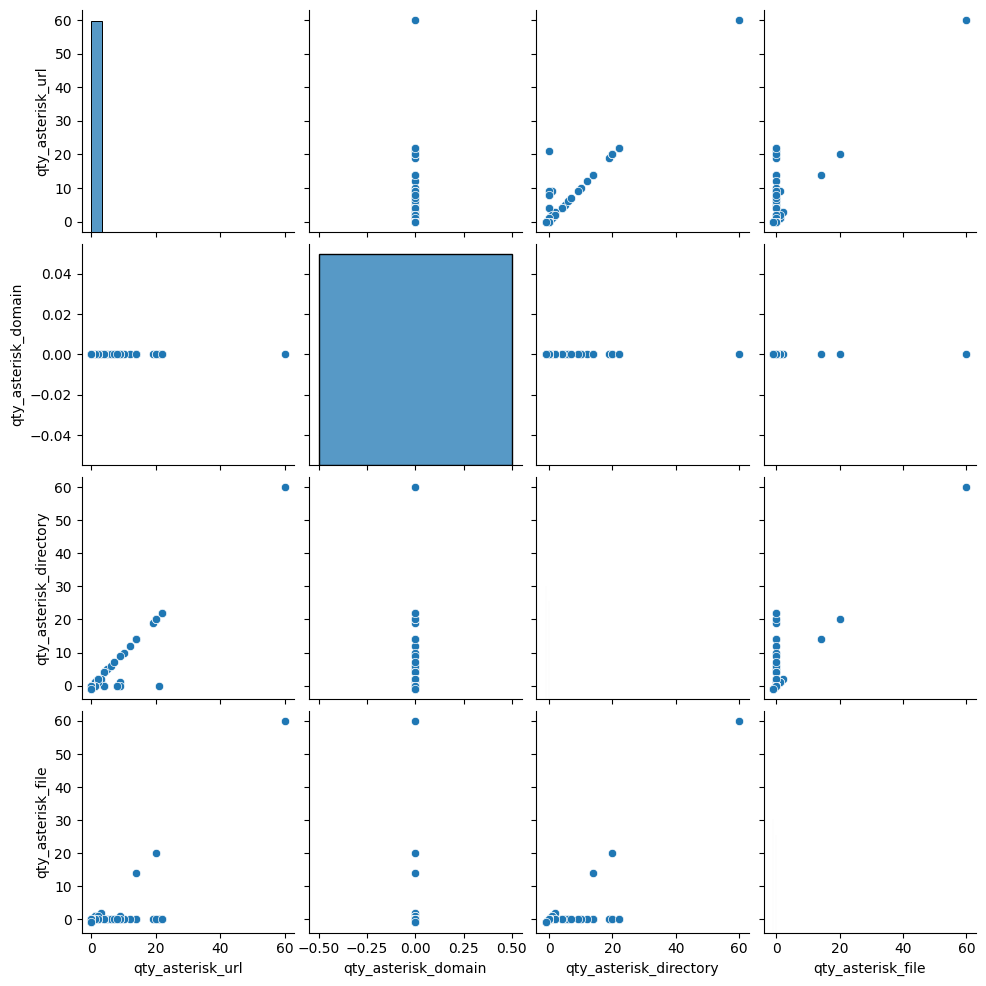

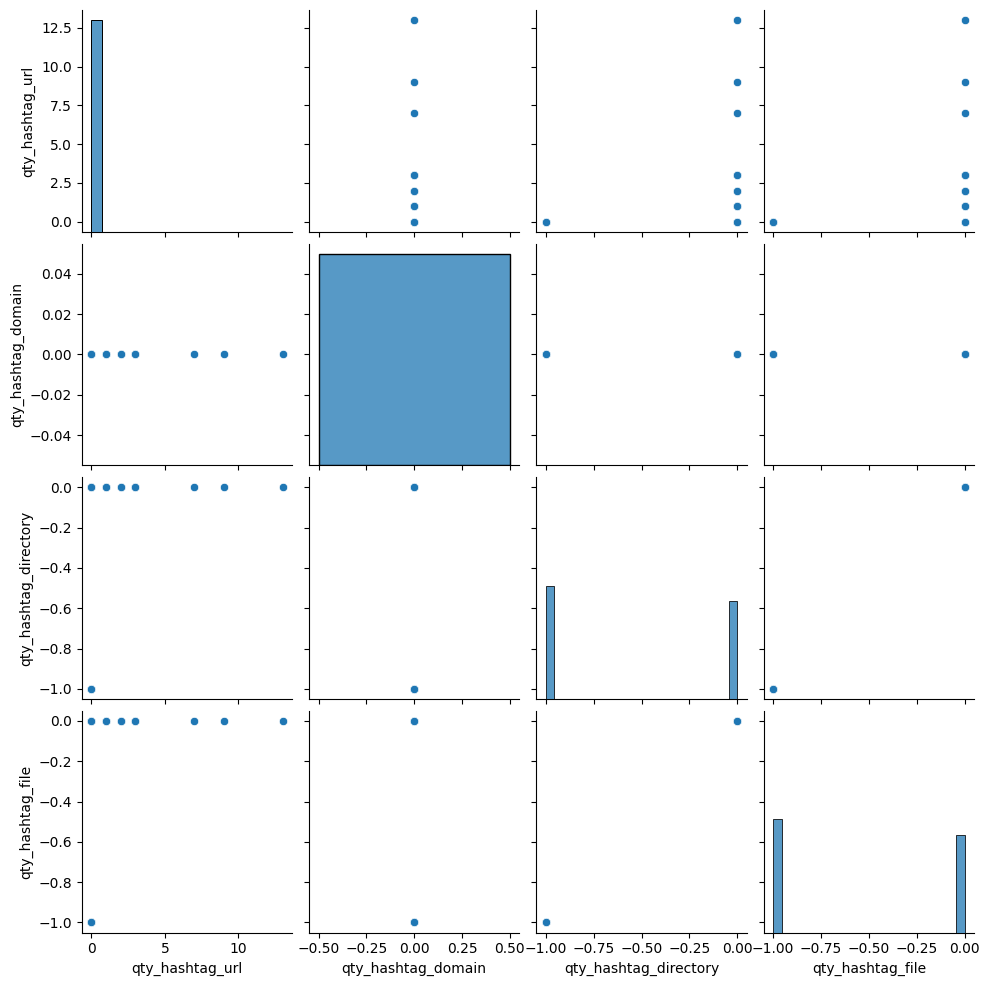

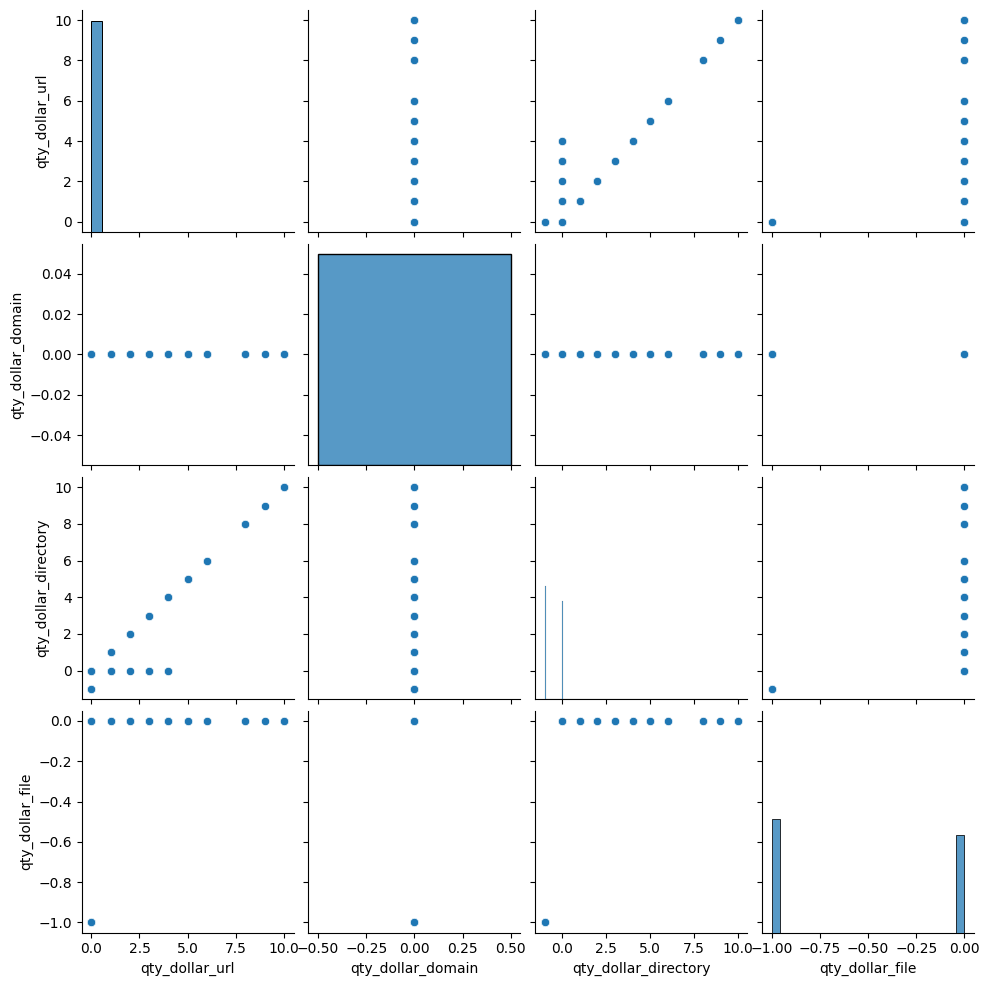

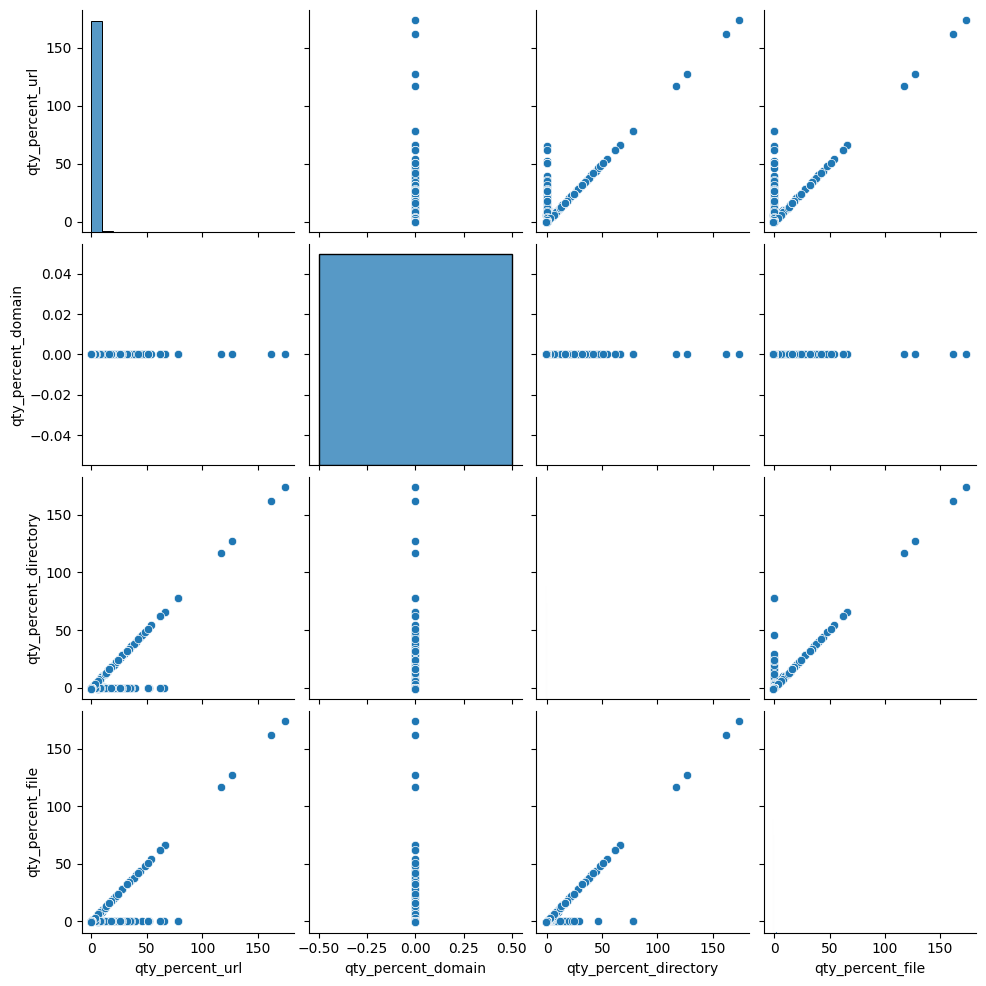

In [6]:
for columns in columns_types:
    sns.pairplot(df[columns[2:-1]], diag_kind="hist")

# Checking Outliers

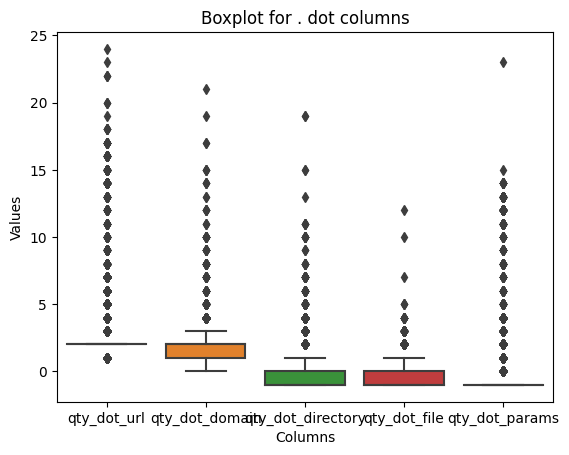

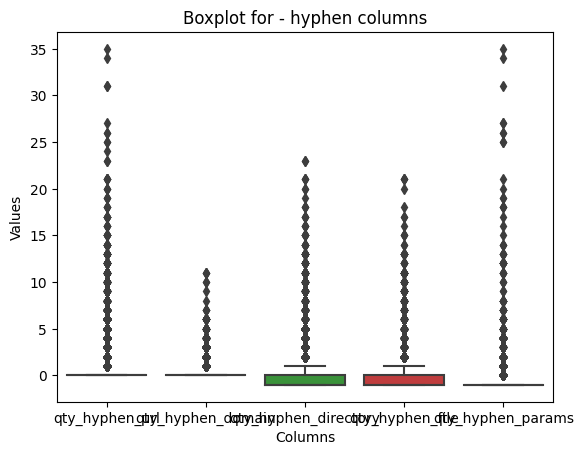

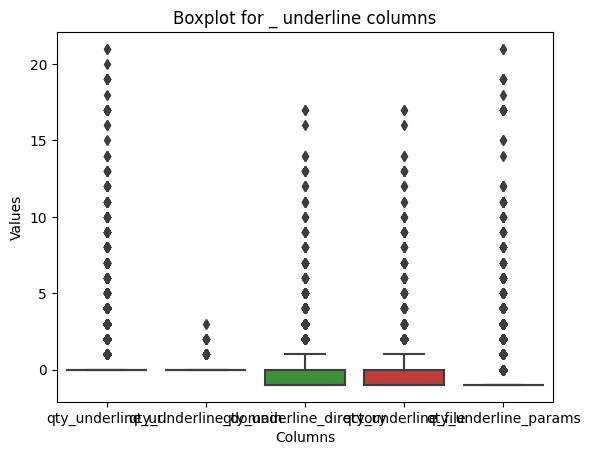

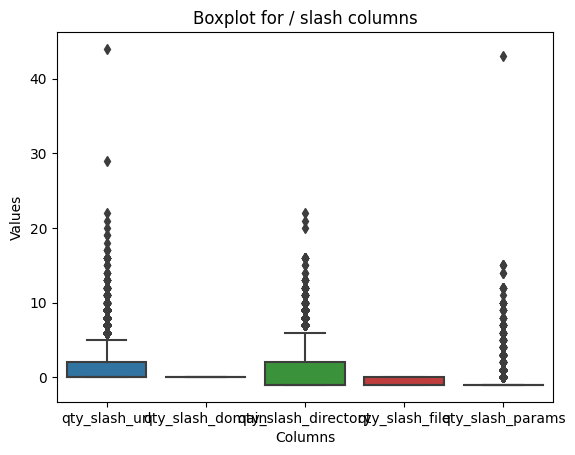

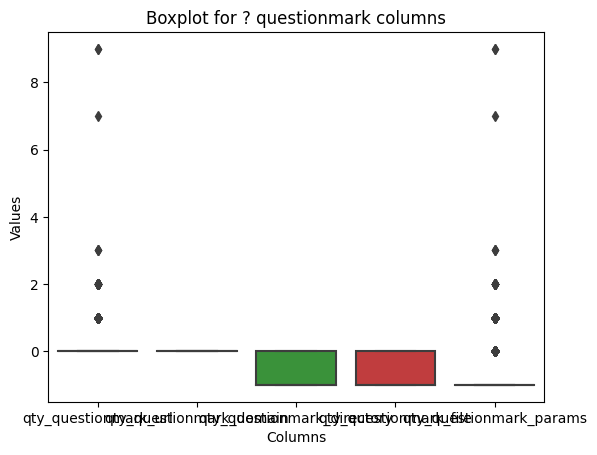

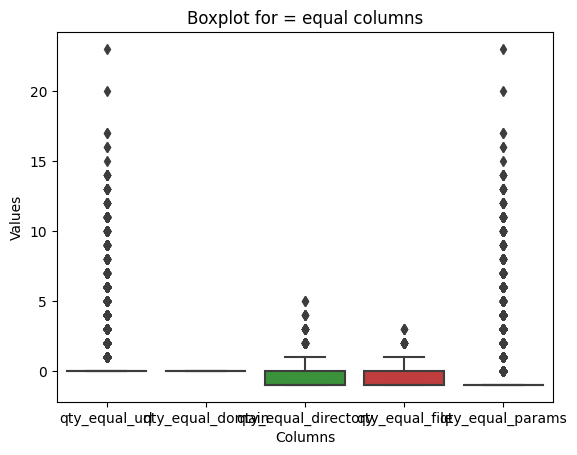

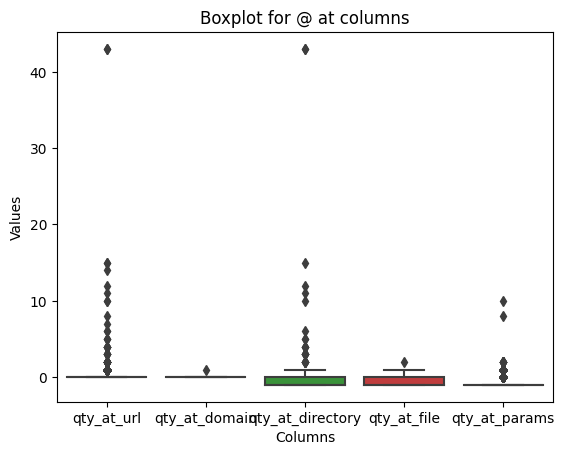

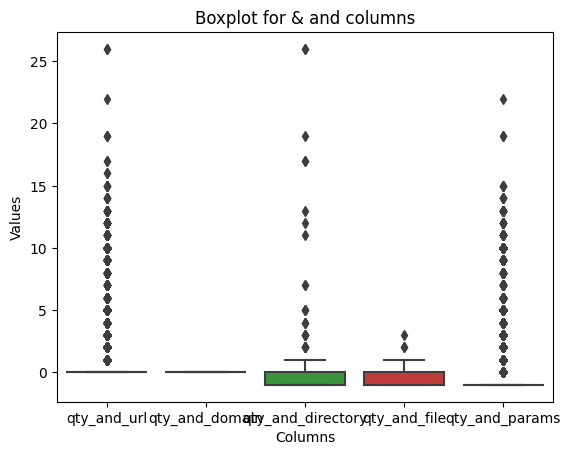

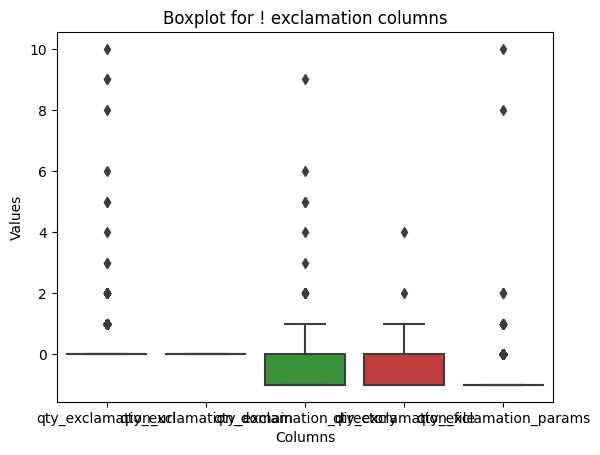

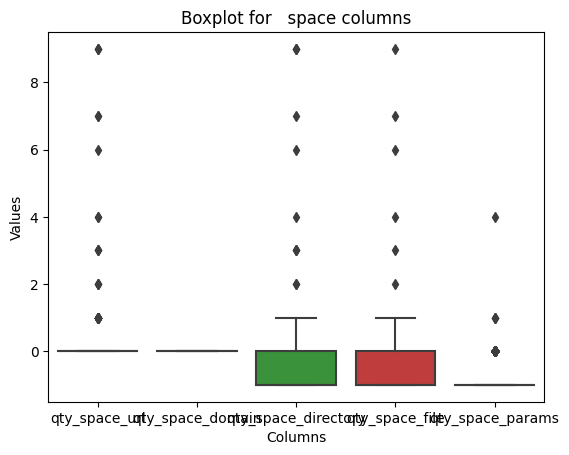

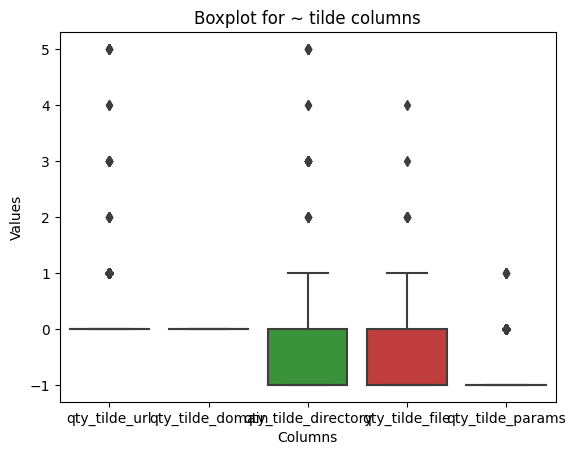

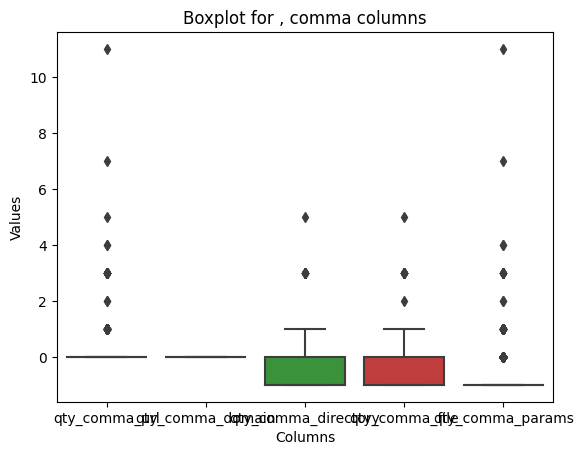

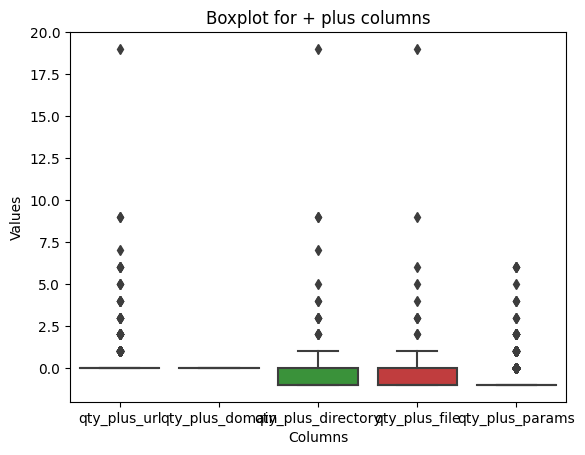

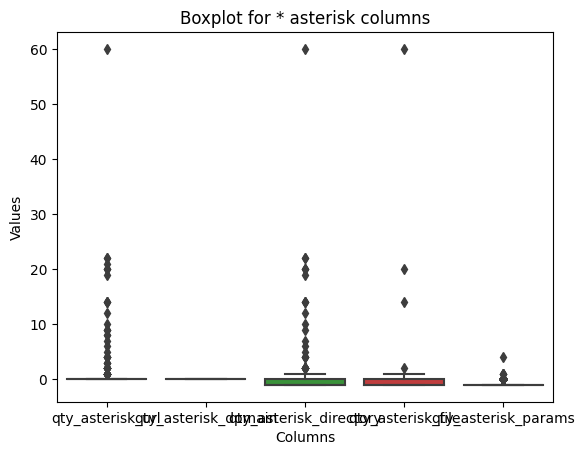

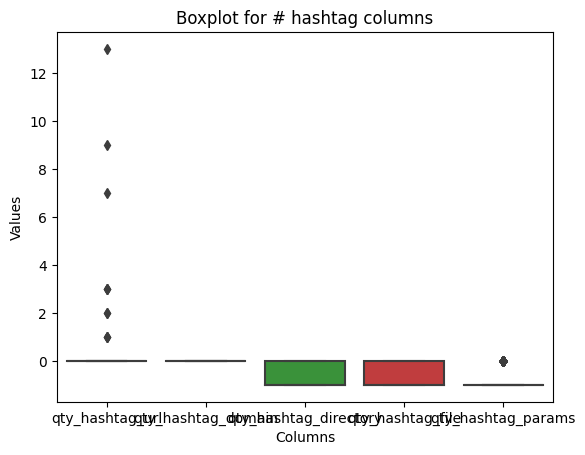

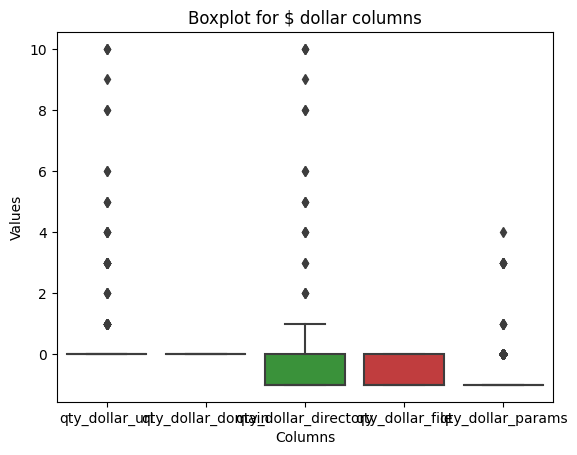

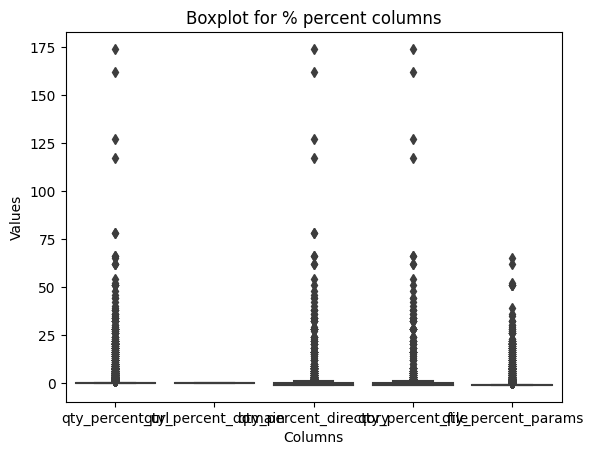

In [7]:
#Boxplot for Outliers

for columns in columns_types:
    # Create a boxplot for each column type
    sns.boxplot(df[columns[2:]])
    
    # Customize plot labels and title
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.title(f"Boxplot for {columns[0]} {columns[1]} columns")
    plt.show()

# There are lot of Outliers in each columns. Honestly this datatset is different and I need to create 2 different pipelines to check and see which model works best with or without outliers.

# Model Training begins from here

In [8]:
# Assigining Independent(Input Variables) to X and Dependent(Output Variable) to Y

x = df.iloc[:, :-1]
y = df.iloc[:, -1:]
y.shape

(88647, 1)

In [9]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [17]:
#list of all the models being used
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "XG Boost": XGBClassifier()
}

# Define hyperparameters to search over for each model
param_grid = {
    "Naive Bayes": {},  # No hyperparameters for Naive Bayes
    "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    "KNN": {'n_neighbors': [3, 5, 7, 9]},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Ada Boost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    "XG Boost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

# Test each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(x, y)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    accuracy = cross_val_score(best_model, x, y, cv=5, scoring='accuracy').mean()
    results[name] = {'accuracy': accuracy, 'best_params': best_params}



Training Naive Bayes...


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training Logistic Regression...


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Training KNN...


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Training Decision Tree...
Training Random Forest...


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Training Ada Boost...


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training XG Boost...
Naive Bayes: Accuracy - 0.8430, Best Parameters - {}
Logistic Regression: Accuracy - 0.9053, Best Parameters - {'C': 0.001}
KNN: Accuracy - 0.8834, Best Parameters - {'n_neighbors': 3}
Decision Tree: Accuracy - 0.9560, Best Parameters - {'max_depth': 10, 'min_samples_split': 2}
Random Forest: Accuracy - 0.9711, Best Parameters - {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Ada Boost: Accuracy - 0.9515, Best Parameters - {'learning_rate': 1, 'n_estimators': 200}
XG Boost: Accuracy - 0.9707, Best Parameters - {'learning_rate': 1, 'n_estimators': 200}


In [84]:
# Print results
for name, result in results.items():
    print(f"{name}: Accuracy - {result['accuracy']:.4f}, Best Parameters - {result['best_params']}")

Naive Bayes: Accuracy - 0.8430, Best Parameters - {}
Logistic Regression: Accuracy - 0.9053, Best Parameters - {'C': 0.001}
KNN: Accuracy - 0.8834, Best Parameters - {'n_neighbors': 3}
Decision Tree: Accuracy - 0.9560, Best Parameters - {'max_depth': 10, 'min_samples_split': 2}
Random Forest: Accuracy - 0.9711, Best Parameters - {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Ada Boost: Accuracy - 0.9515, Best Parameters - {'learning_rate': 1, 'n_estimators': 200}
XG Boost: Accuracy - 0.9707, Best Parameters - {'learning_rate': 1, 'n_estimators': 200}


In [86]:
#best model with accuracy
best_accuracy = 0
best_models = []

for model, data in results.items():
    accuracy = data['accuracy']
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_models = [model]
    elif accuracy == best_accuracy:
        best_models.append(model)

print("Best modes is:-",  best_models[0], "-: with the accuracy score of : ", results[best_models[0]]["accuracy"], "paramaters selected are :- ", results[best_models[0]]["best_params"])

Best modes is:- Random Forest -: with the accuracy score of :  0.9710650138194843 paramaters selected are :-  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
